Importamos las librerias pandas, numpy, matplotlib y math

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Leemos el archivo csv. Enlace: https://www.kaggle.com/datasets/micheldc55/publicity-influence-on-sales/data

In [ ]:
archivo = pd.read_csv("/content/publicity_in_media.csv")
data = archivo
data.head()

,Unnamed: 0,tv,radio,periodico,ventas
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   tv          200 non-null    float64
 2   radio       200 non-null    float64
 3   periodico   200 non-null    float64
 4   ventas      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe()

,Unnamed: 0,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,0.000000,0.700000,0.000000,0.300000,1.600000
25%,49.750000,74.375000,9.975000,12.750000,10.375000
50%,99.500000,149.750000,22.900000,25.750000,12.900000
75%,149.250000,218.825000,36.525000,45.100000,17.400000
max,199.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.corr()['ventas'].sort_values(ascending=False)

ventas        1.000000
tv            0.782224
radio         0.576223
periodico     0.228299
Unnamed: 0   -0.051616
Name: ventas, dtype: float64

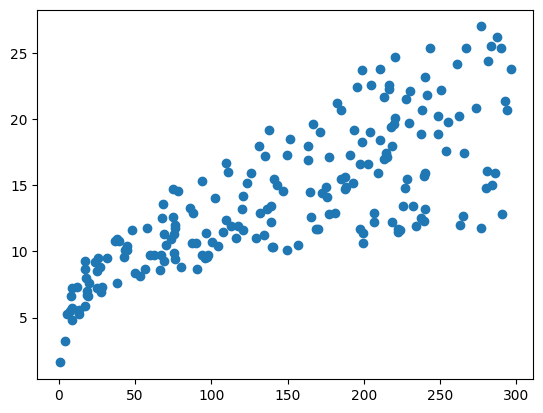

In [ ]:
plt.scatter(data['tv'], data['ventas'])
plt.show()

Preprocesamiento


---
Añadimos la columna cuadrada


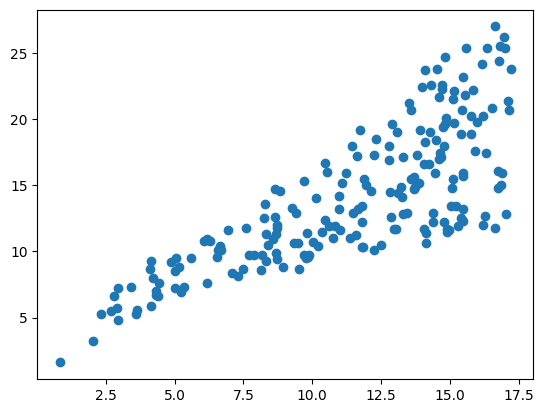

In [ ]:
datos = data['tv'].values.copy()
for i in range(datos.shape[0]):
  datos[i] = math.sqrt(datos[i])
data['tv2'] = datos
plt.scatter(data['tv2'], data['ventas'])
plt.show()

Funciones para la regresion


---



In [ ]:
def division_datos(entrenamiento, datos):
  entrenamiento = int(entrenamiento*len(data))
  prueba = len(data) - entrenamiento

  entrenamiento = data.sample(n=entrenamiento, random_state=1)
  prueba = data.drop(entrenamiento.index)

  return [entrenamiento,prueba]

In [ ]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [ ]:
def Normalizar(datos,min,max):
  return (datos - min) / (max - min)

In [ ]:
def prediccion (theta,datos):
  datos_ = datos.copy()
  datos_.insert(0, 'x0', 1)
  return np.dot(datos_,theta)

In [ ]:
def ECM (Y_test,predic):
  return ((Y_test - predic) ** 2).mean().values[0]

In [ ]:
def h0(x,theta):
  return np.dot(theta,x)

In [ ]:
def Regresion_lineal(columnas_entrada,columna_salida,iteraciones, aprendizaje):

  # Seteamos algunos parametros iniciales
  variables = columnas_entrada.shape[1] + 1
  theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
  cantidad_datos = columnas_entrada.shape[0]
  y = columna_salida.values
  x = columnas_entrada.copy()
  x.insert(0, 'x0', 1)
  x = x.values

  # Realizamos el entrenamiento

  while iteraciones:
    iteraciones -= 1

    # Entrenamos cada theta
    for O in range(theta.shape[0]):

      costo = sum( (h0(theta,x)-y) * x[:,O].reshape(-1,1))
      theta[O] -= aprendizaje / cantidad_datos * costo

  return theta.reshape(variables,1)

In [ ]:
def Reg_Matrix(x_,y):
  x = x_.copy()
  x.insert(0, 'x0', 1)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

Seleccionamos las columnas de entrada y salida, y dividimos datos

In [ ]:
columnas_entrada = ['tv2']
columna_salida = ['ventas']

In [ ]:
data = data[columnas_entrada + columna_salida]
data

,tv2,ventas
0,15.169047,22.1
1,6.670832,10.4
2,4.147288,9.3
3,12.308534,18.5
4,13.446189,12.9
...,...,...
195,6.180615,7.6
196,9.705668,9.7
197,13.304135,12.8
198,16.840428,25.5


In [ ]:
exp_1 = division_datos(entrenamiento = 0.7, datos = data)
exp_2 = division_datos(entrenamiento = 0.5, datos = data)
exp_3 = division_datos(entrenamiento = 0.3, datos = data)

Normalizamos

In [ ]:
exp_1[0], min1, max1 = Normalizar_entrenamiento(exp_1[0])
exp_2[0], min2, max2 = Normalizar_entrenamiento(exp_2[0])
exp_3[0], min3, max3 = Normalizar_entrenamiento(exp_3[0])

In [ ]:
exp_1[1] = Normalizar(exp_1[1], min1, max1)
exp_2[1] = Normalizar(exp_2[1], min2, max2)
exp_3[1] = Normalizar(exp_3[1], min3, max3)

In [ ]:
exp_1[0].describe()

,tv2,ventas
count,140.000000,140.000000
mean,0.415503,0.514062
std,0.164454,0.204663
min,0.000000,0.030096
25%,0.309483,0.371140
50%,0.465624,0.475621
75%,0.547842,0.642200
max,0.642585,1.000000


Revisamos que tenga misma proporción

In [ ]:
data.mean()

tv2       11.402408
ventas    14.022500
dtype: float64

In [ ]:
exp_1[0].mean()

tv2       0.415503
ventas    0.514062
dtype: float64

In [ ]:
exp_2[0].mean()

tv2       0.387318
ventas    0.500423
dtype: float64

In [ ]:
exp_3[0].mean()

tv2       0.403702
ventas    0.520210
dtype: float64

In [ ]:
X_1 = exp_1[0][columnas_entrada]
Y_1 = exp_1[0][columna_salida]
X_2 = exp_2[0][columnas_entrada]
Y_2 = exp_2[0][columna_salida]
X_3 = exp_3[0][columnas_entrada]
Y_3 = exp_3[0][columna_salida]
theta_1 = Reg_Matrix(X_1,Y_1)
theta_2 = Reg_Matrix(X_2,Y_2)
theta_3 = Reg_Matrix(X_3,Y_3)
theta_1

array([[0.10197248],
       [0.99178455]])

In [ ]:
theta_1_1 = Regresion_lineal(X_1,Y_1,1000,0.1)
theta_1_1

array([[0.13624331],
       [0.91121512]])

Testeamos el modelo

In [ ]:
X_1 = exp_1[1][columnas_entrada]
Y_1 = exp_1[1][columna_salida]
X_2 = exp_2[1][columnas_entrada]
Y_2 = exp_2[1][columna_salida]
X_3 = exp_3[1][columnas_entrada]
Y_3 = exp_3[1][columna_salida]

In [ ]:
Y_1_pred = prediccion(theta_1, X_1)
ecm_valor = ECM(Y_1_pred, Y_1)
ecm_valor

0.017592173754958137

In [ ]:
Y_1_1_pred = prediccion(theta_1_1, X_1)
ecm_valor = ECM(Y_1_1_pred, Y_1)
ecm_valor

0.017787563116776296

In [ ]:
Y_2_pred = prediccion(theta_2, X_2)
ecm_valor = ECM(Y_2_pred, Y_2)
ecm_valor

0.018762490383793264

In [ ]:
Y_3_pred = prediccion(theta_3, X_3)
ecm_valor = ECM(Y_3_pred, Y_3)
ecm_valor

0.019798758761601143

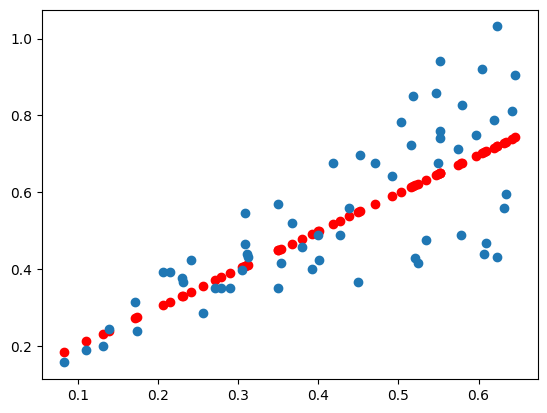

In [ ]:
plt.scatter(X_1['tv2'],Y_1_pred, color='red')
plt.scatter(X_1['tv2'],Y_1)

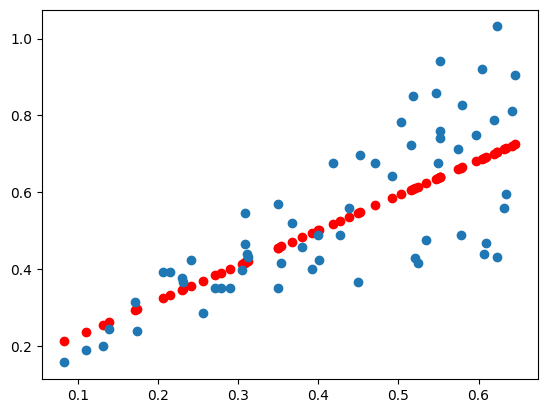

In [ ]:
plt.scatter(X_1['tv2'],Y_1_1_pred, color='red')
plt.scatter(X_1['tv2'],Y_1)

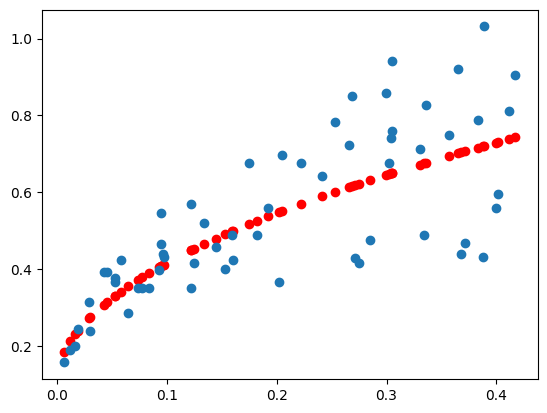

In [ ]:
plt.scatter(X_1['tv2']**2,Y_1_pred, color='red')
plt.scatter(X_1['tv2']**2,Y_1)

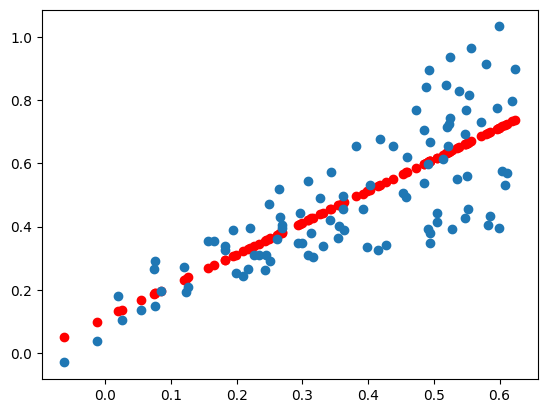

In [ ]:
plt.scatter(X_2['tv2'],Y_2_pred, color='red')
plt.scatter(X_2['tv2'],Y_2)

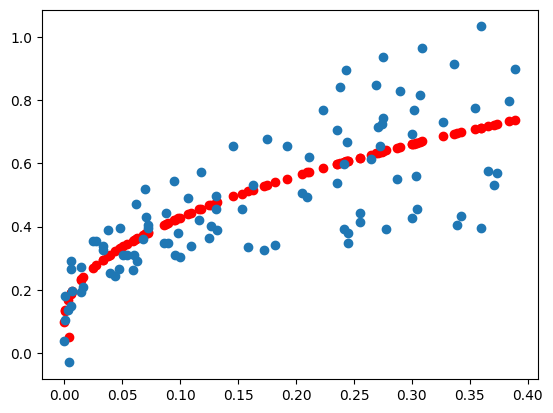

In [ ]:
plt.scatter(X_2['tv2']**2,Y_2_pred, color='red')
plt.scatter(X_2['tv2']**2,Y_2)

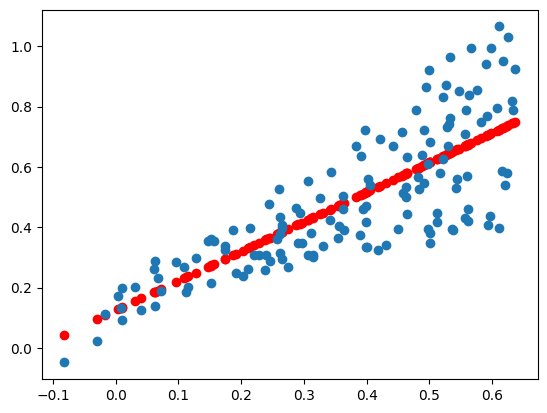

In [ ]:
plt.scatter(X_3['tv2'],Y_3_pred, color='red')
plt.scatter(X_3['tv2'],Y_3)

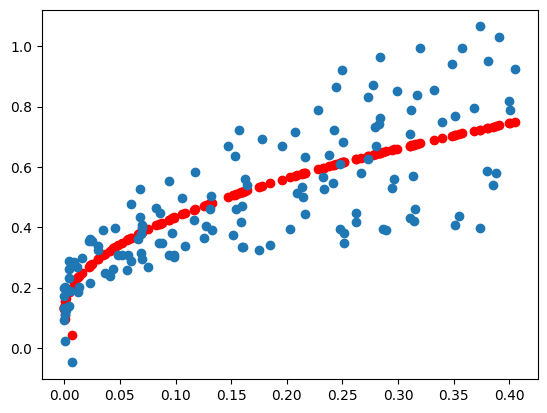

In [ ]:
plt.scatter(X_3['tv2']**2,Y_3_pred, color='red')
plt.scatter(X_3['tv2']**2,Y_3)

In [ ]:
class Regresion:
  def __init__(self,tipo,x,y):
    self.tipo = tipo
    self.columnas_entrada = x
    self.columna_salida = y

# Funciones Fit, validar, Predict

  # Datos | Porcentaje de entrenamiento
  # Iteraciones | Ratio de aprendizaje
  def fit(self, data, train , iter = 20, ratio = 0.1):
    self.exp = division_datos(train,data)
    X = self.exp[0][self.columnas_entrada]
    Y = self.exp[0][self.columna_salida]

    if self.tipo == 'M':
      self.theta = Reg_Matrix(X, Y)
    elif self.tipo == 'L':
      self.theta = Regresion_lineal(X, Y, iter, ratio)

  def validar(self):
    X = exp_1[1][self.columnas_entrada]
    Y = exp_1[1][self.columna_salida]
    return ECM(prediccion(self.theta, X), Y)

  def predict (self,datos):
    datos_ = datos.copy()
    datos_.insert(0, 'x0', 1)
    return np.dot(datos_,self.theta)

# Modelos de regresion

  def Reg_Matrix(x_,y):
    x = x_.copy()
    x.insert(0, 'x0', 1)
    theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    return np.reshape(theta,(theta.shape[0],1))

  def Regresion_lineal(columnas_entrada,columna_salida,iteraciones, aprendizaje):

    # Seteamos algunos parametros iniciales
    variables = columnas_entrada.shape[1] + 1
    theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
    cantidad_datos = columnas_entrada.shape[0]
    y = columna_salida.values
    x = columnas_entrada.copy()
    x.insert(0, 'x0', 1)
    x = x.values

    # Realizamos el entrenamiento

    while iteraciones:
      iteraciones -= 1

      # Entrenamos cada theta
      for O in range(theta.shape[0]):

        costo = sum( (np.dot(x,theta)-y) * x[:,O].reshape(-1,1))
        theta[O] -= aprendizaje / cantidad_datos * costo

    return theta.reshape(variables,1)

In [ ]:
modelo = Regresion('M',['tv2'],['ventas'])
modelo.fit(data,0.7)
modelo.validar()

6.145060501752918

In [ ]:
modelo = Regresion('L',['tv2'],['ventas'])
modelo.fit(data,0.7)
modelo.validar()

2.591691711008717e+43